In [3]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('lab6.jpg')  # Replace with your image path

# Convert the image to the HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Increase saturation to make the colors more vibrant (candy-like)
hsv[:, :, 1] = hsv[:, :, 1] * 1.5  # Increase saturation (factor of 1.5)

# Convert back to BGR color space
brightened_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Adjust brightness by adding a constant value (for candy effect)
brightened_image = cv2.convertScaleAbs(brightened_image, alpha=1.2, beta=30)

# Apply a Gaussian blur to smoothen the image and make it more candy-like
blurred_image = cv2.GaussianBlur(brightened_image, (21, 21), 0)

# Show the result
cv2.imshow('Candy Filter Effect', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the result if needed
cv2.imwrite('candy_filter_result.jpg', blurred_image)


True

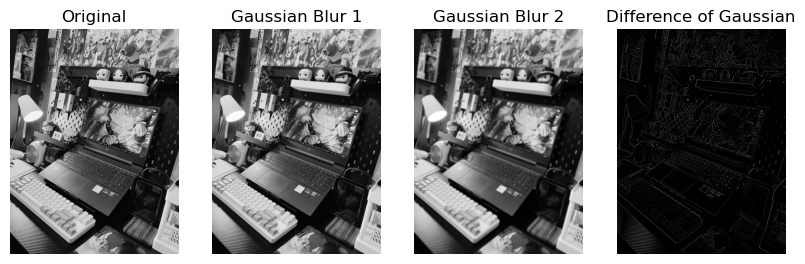

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def difference_of_gaussian(image_path, ksize1=3, ksize2=9):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise ValueError("Image not found or could not be loaded.")
    
    # Apply Gaussian Blur with different kernel sizes
    gaussian1 = cv2.GaussianBlur(image, (ksize1, ksize1), 0)
    gaussian2 = cv2.GaussianBlur(image, (ksize2, ksize2), 0)
    
    # Compute the Difference of Gaussian
    dog = cv2.subtract(gaussian1, gaussian2)
    
    return image, gaussian1, gaussian2, dog

def display_results(image, gaussian1, gaussian2, dog):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 4, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(gaussian1, cmap='gray')
    plt.title('Gaussian Blur 1')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(gaussian2, cmap='gray')
    plt.title('Gaussian Blur 2')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.imshow(dog, cmap='gray')
    plt.title('Difference of Gaussian')
    plt.axis('off')
    
    plt.show()

# Example usage
image_path = 'lab6.jpg'  # Replace with your actual image path
image, gaussian1, gaussian2, dog = difference_of_gaussian(image_path)
display_results(image, gaussian1, gaussian2, dog)


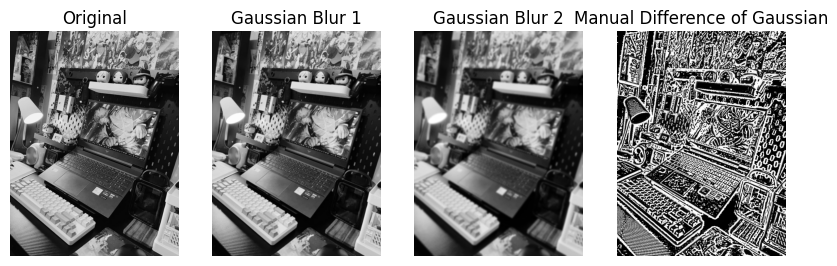

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

def manual_difference_of_gaussian(image_path, sigma1=1, sigma2=3):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise ValueError("Image not found or could not be loaded.")
    
    # Apply Gaussian Blur with different sigma values (manually)
    gaussian1 = ndimage.gaussian_filter(image, sigma=sigma1)
    gaussian2 = ndimage.gaussian_filter(image, sigma=sigma2)
    
    # Compute the Difference of Gaussian
    dog = gaussian1 - gaussian2
    
    return image, gaussian1, gaussian2, dog

def display_results(image, gaussian1, gaussian2, dog):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 4, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(gaussian1, cmap='gray')
    plt.title('Gaussian Blur 1')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(gaussian2, cmap='gray')
    plt.title('Gaussian Blur 2')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.imshow(dog, cmap='gray')
    plt.title('Manual Difference of Gaussian')
    plt.axis('off')
    
    plt.show()

# Example usage
image_path = 'lab6.jpg'  # Replace with your actual image path
image, gaussian1, gaussian2, dog = manual_difference_of_gaussian(image_path)
display_results(image, gaussian1, gaussian2, dog)

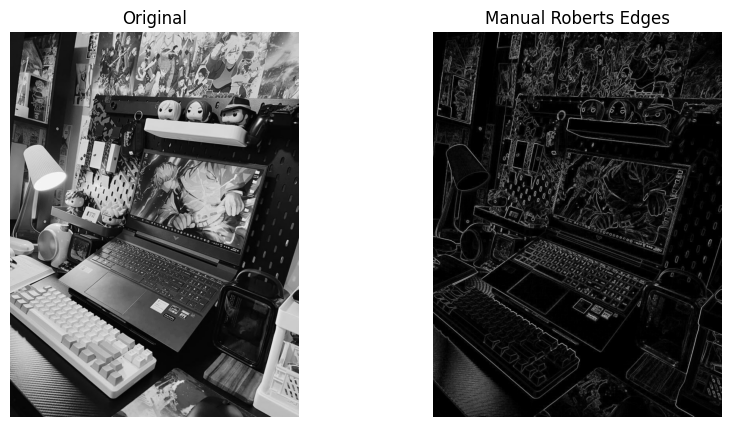

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_roberts_filter(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise ValueError("Image not found or could not be loaded.")
    
    # Roberts Cross operators
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])
    
    # Pad the image to handle boundary conditions
    padded_image = np.pad(image, ((0, 1), (0, 1)), mode='edge')
    
    # Initialize output arrays
    grad_x = np.zeros_like(image, dtype=np.float64)
    grad_y = np.zeros_like(image, dtype=np.float64)
    
    # Apply Roberts Cross operators
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            grad_x[i, j] = np.sum(padded_image[i:i+2, j:j+2] * kernel_x)
            grad_y[i, j] = np.sum(padded_image[i:i+2, j:j+2] * kernel_y)
    
    # Calculate magnitude of the gradient
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    # Normalize the magnitude to 0-255
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    return image, magnitude

def display_results(image, edges):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Manual Roberts Edges')
    plt.axis('off')
    
    plt.show()

# Example usage
image_path = 'lab6.jpg'  # Replace with your image path
image, edges = manual_roberts_filter(image_path)
display_results(image, edges)

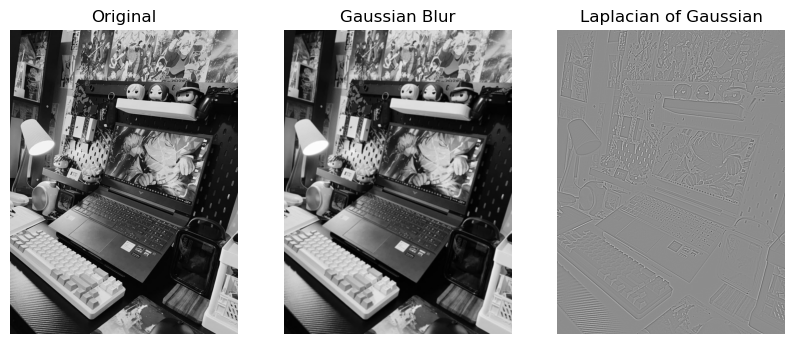

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def laplacian_of_gaussian(image_path, ksize=5):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise ValueError("Image not found or could not be loaded.")
    
    # Apply Gaussian Blur
    gaussian_blur = cv2.GaussianBlur(image, (ksize, ksize), 0)
    
    # Apply Laplacian filter
    log = cv2.Laplacian(gaussian_blur, cv2.CV_64F)
    
    return image, gaussian_blur, log

def display_results(image, gaussian_blur, log):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(gaussian_blur, cmap='gray')
    plt.title('Gaussian Blur')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(log, cmap='gray')
    plt.title('Laplacian of Gaussian')
    plt.axis('off')
    
    plt.show()

# Example usage
image_path = 'lab6.jpg'  # Replace with your actual image path
image, gaussian_blur, log = laplacian_of_gaussian(image_path)
display_results(image, gaussian_blur, log)


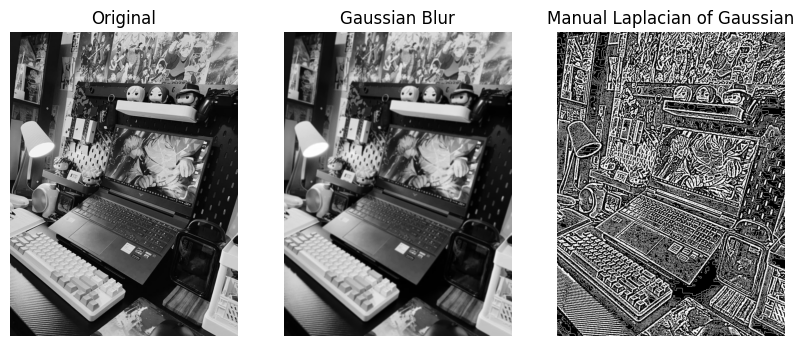

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

def manual_laplacian_of_gaussian(image_path, ksize=5, sigma=1.4):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise ValueError("Image not found or could not be loaded.")
    
    # Apply Gaussian Blur (manually)
    gaussian_blur = ndimage.gaussian_filter(image, sigma=sigma)
    
    # Apply Laplacian filter (manually)
    laplacian_kernel = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]])
    log = ndimage.convolve(gaussian_blur, laplacian_kernel)
    
    return image, gaussian_blur, log

def display_results(image, gaussian_blur, log):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(gaussian_blur, cmap='gray')
    plt.title('Gaussian Blur')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(log, cmap='gray')
    plt.title('Manual Laplacian of Gaussian')
    plt.axis('off')
    
    plt.show()

# Example usage
image_path = 'lab6.jpg'  # Replace with your actual image path
image, gaussian_blur, log = manual_laplacian_of_gaussian(image_path)
display_results(image, gaussian_blur, log)

In [2]:
pip install scipy

   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/46.2 MB 419.4 kB/s eta 0:01:49
   ---------------------------------------- 0.5/46.2 MB 419.4 kB/s eta 0:01:49
   ---------------------------------------- 0.5/46.2 MB 419.4 kB/s eta 0:01:49
    --------------------------------------- 0.8/46.2 MB 466.0 kB/s eta 0:01:38
   - -------------------------------------- 1.3/46.2 MB 699.0 kB/s eta 0:01:05
   - -------------------------------------- 1.6/46.2 MB 798.7 kB/s eta 0:00:56
   - -------------------------------------- 2.1/46.2 MB 946.9 kB/s eta 0:00:47
   -- ---------------------

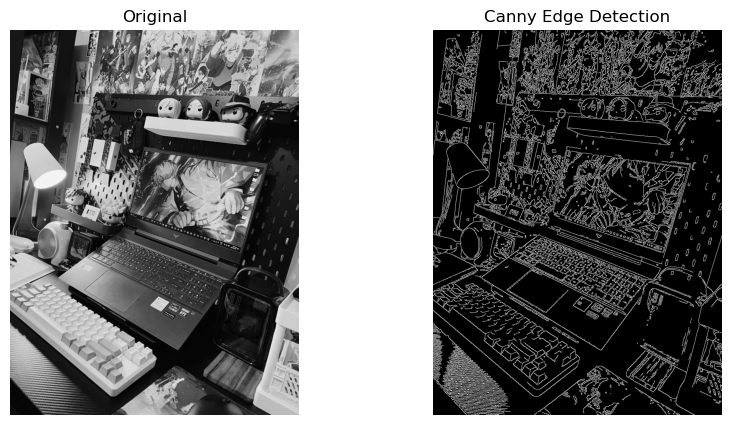

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny_edge_detection(image_path, threshold1=100, threshold2=200):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise ValueError("Image not found or could not be loaded.")
    
    # Apply Canny edge detection
    edges = cv2.Canny(image, threshold1, threshold2)
    
    return image, edges

def display_results(image, edges):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')
    
    plt.show()

# Example usage
image_path = 'lab6.jpg'  # Replace with your actual image path
image, edges = canny_edge_detection(image_path)
display_results(image, edges)


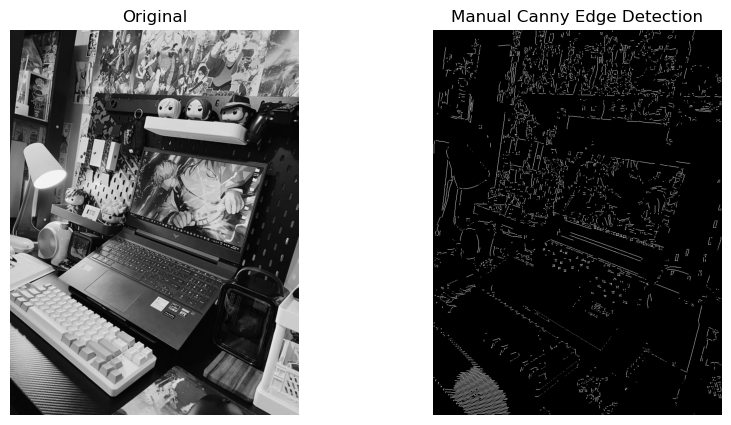

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_canny_edge_detection(image_path, low_threshold=50, high_threshold=150):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise ValueError("Image not found or could not be loaded.")
    
    # Step 1: Apply Gaussian Blur
    blurred = cv2.GaussianBlur(image, (5, 5), 1.4)
    
    # Step 2: Compute Gradient Magnitude and Direction using Sobel operators
    grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    direction = np.arctan2(grad_y, grad_x)
    
    # Step 3: Non-Maximum Suppression
    nms = np.zeros_like(magnitude, dtype=np.uint8)
    angle = direction * 180 / np.pi
    angle[angle < 0] += 180
    
    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            q = 255
            r = 255
            
            # Determine neighboring pixels for interpolation
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = magnitude[i, j + 1]
                r = magnitude[i, j - 1]
            elif (22.5 <= angle[i, j] < 67.5):
                q = magnitude[i + 1, j - 1]
                r = magnitude[i - 1, j + 1]
            elif (67.5 <= angle[i, j] < 112.5):
                q = magnitude[i + 1, j]
                r = magnitude[i - 1, j]
            elif (112.5 <= angle[i, j] < 157.5):
                q = magnitude[i - 1, j - 1]
                r = magnitude[i + 1, j + 1]
            
            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                nms[i, j] = magnitude[i, j]
            else:
                nms[i, j] = 0
    
    # Step 4: Double Thresholding
    strong_edges = np.zeros_like(nms, dtype=np.uint8)
    weak = 50
    strong = 255
    
    strong_edges[nms >= high_threshold] = strong
    strong_edges[(nms >= low_threshold) & (nms < high_threshold)] = weak
    
    # Step 5: Edge Tracking by Hysteresis
    final_edges = strong_edges.copy()
    for i in range(1, final_edges.shape[0] - 1):
        for j in range(1, final_edges.shape[1] - 1):
            if final_edges[i, j] == weak:
                if (strong in [final_edges[i+1, j-1], final_edges[i+1, j], final_edges[i+1, j+1],
                               final_edges[i, j-1], final_edges[i, j+1],
                               final_edges[i-1, j-1], final_edges[i-1, j], final_edges[i-1, j+1]]):
                    final_edges[i, j] = strong
                else:
                    final_edges[i, j] = 0
    
    return image, final_edges

def display_results(image, edges):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Manual Canny Edge Detection')
    plt.axis('off')
    
    plt.show()

# Example usage
image_path = 'lab6.jpg'  # Replace with your actual image path
image, edges = manual_canny_edge_detection(image_path)
display_results(image, edges)
